<a href="https://colab.research.google.com/github/min0908/likelion/blob/main/%5BMINI%5D_web_scrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 국민동의청원 데이터 수집하기


✔️사이트 URL (모든 청원) : https://petitions.assembly.go.kr/closed/agreeEnded

✔️ requests url : inspect > network > header > RequestURL

✔️ inspect > Network에서 requests Headers를 확인해보면 'Accept: application/json, text/plain, */*'으로 나타난다. 
     
  → json 타입으로 데이터를 받기 위해 json()을 사용 

In [1]:
# 라이브러리 불러오기
import pandas as pd
import requests
import time
import datetime 
from bs4 import BeautifulSoup as bs

✔️ 일단 청원 목록 json을 보면 청원의 취지를 제외한 청원의 분야, 제목, 종료일, 결과, 내용, url을 얻을 수 있다.

✔️ 먼저 list comprehension을 이용하여 각각의 리스트를 구한다.

✔️ 청원의 취지는 for 반복문을 이용하여 각 url별로 따로 구해 리스트로 저장한다.

✔️ 각 리스트가 column이 되도록 dataframe을 생성한다.

In [2]:
# 페이지 number을 매개변수로 받아 청원정보를 크롤링하는 함수
def petition_crawler(page_no):
    try:
        base_url = f'https://petitions.assembly.go.kr/api/petits?pageIndex={page_no}&recordCountPerPage=8&sort=AGRE_END_DE-&searchCondition=sj&searchKeyword=&petitRealmCode=&sttusCode=PETIT_FORMATN,CMIT_FRWRD,PETIT_END&resultCode=BFE_OTHBC_WTHDRAW,PROGRS_WTHDRAW,PETIT_UNACPT,APPRVL_END_DSUSE,ETC_TRNSF&notInColumn=RESULT_CODE&beginDate=20210119&endDate=20230119&ageCd='
        headers = {"user-agent": "Mozilla/5.0"}

        base_response = requests.get(base_url, headers=headers)
        base_json=base_response.json()

        # 청원 제목, 동의수, 분야, 종료일, 결과, 내용을 각각의 리스트로 만들기
        pet_title= list(r['petitSj'] for r in base_json)
        pet_agree= list(r['agreCo'] for r in base_json)
        pet_field = list(r['petitRealmNm'] for r in base_json)
        pet_end = list(r['petitEndDt'][:10] for r in base_json)
        pet_result = list(r['resultCodeNm'] for r in base_json)
        pet_detail = list(r['petitCn'] for r in base_json)

        pet_view = []
        for i in range(len(pet_title)):
            content_url = 'https://petitions.assembly.go.kr/api/petits/' + base_json[i]['petitId']
            content_response = requests.get(content_url, headers=headers)
            content_json=content_response.json()
            result = content_json['petitObjet']
            pet_view.append(result)
            time.sleep(0.01)
    
        df = pd.DataFrame({'청원분야':pet_field, '청원제목':pet_title, '동의수': pet_agree,  '청원종료일':pet_end, '청원결과':pet_result, '청원의 내용':pet_detail,'청원의 취지' :pet_view})
        return df

    except Exceptions as e:
        print(f"페이지를 다시 입력헤주세요.")


In [3]:
# 1페이지 내용 수집하여 DataFrame 만들기
page_no = 1
petition_crawler(page_no)

,청원분야,청원제목,동의수,청원종료일,청원결과,청원의 내용,청원의 취지
0,재난/안전/환경,기상직 면접 미흡 결정 기준과 미흡 상세 이유 통보 요청에 관한 청원,121,2023-01-20,동의만료폐기,우선 제가 응시한 기상직 7급의 경우 2017년 이후로 5년 만에 시험이 재개가 된...,공무원 면접 미흡 사유가 구체적으로 어떻게 되는지 그리고 왜 비공개인지 알고싶습니다.
1,행정/지방자치,외국인 선거권 폐지 요청에 관한 청원,2618,2023-01-20,동의만료폐기,이번에 \n경기도지사 선거에서 표 차이는 8913표 차이였습니다\n현재 \n지방선거...,국내 정치를 좌우하는 외국인 투표로 좌우되는 문제점
2,수사/법무/사법제도,김남국 국회 의원은 양승태 전대법원장 사법 농단 피해자 구제를 위한 특별 법안을 발...,197,2023-01-20,동의만료폐기,# 아래 관련 파일 첨부 참조 요망 #\n\n법률 제 호\n\n# 양승태 전 대...,양승태 전 대법원장 체제하에서의 대법원이 상고 법원 \n설치 등 특정 목적을 관철 ...
3,국토/해양/교통,장기전세 보증금 인상률 1년 납부 유예 및 보증금 인상률 재논의에 관한 청원,500,2023-01-20,동의만료폐기,"안녕하십니까, 저는 38차 장기전세 거주에 당첨되어 현재 장기전세에 거주하고 있는 ...",서민 주거 안정을 위한 목적에 부합하지 않는 공공주택 운영 방안 실태
4,재정/세제/금융/예산,일시적 2주택자 종부세 특례 기간 3년로 변경 요청에 관한 청원,121,2023-01-20,동의만료폐기,일시적 2주택자 종부세 특례 기간을 양도세 비과세 특례기간과 동일하게 3년으로 변경...,일시적 2주택자 종부세 특례 기간이 2년으로 규정되어 아래와 같이 문제점이 있습니다...
5,교육,공정과 상식에 맞는 감사보다는 조직 보호만 일삼는 경기도교육청 경교피아 척결을 위한...,145,2023-01-20,동의만료폐기,지난 이태원 핼러윈 축제 참사에서도 보았듯이 국가 기관의 잘못으로 나뿐만 아니라 모...,봐주기 감사와 부실감사는 물론 조직 보호만 일삼는 경기도교육청 경교피아 척결을 위한...
6,보건의료,실내마스크 전면 해제 요청에 관한 청원,2050,2023-01-20,동의만료폐기,까페에 들어가면\n앉자마자 마스크를 벗고\n대화를 하고 식사를 하고\n다시 카운터 ...,실내마스크 착용은 아무런 의미도 없습니다\n그저 탁상행정일뿐입니다
7,행정/지방자치,"경찰공무원이 스토킹범죄, 음란물유포죄 등으로 벌금 100만원 이상 선고 받으면 임용...",3350,2023-01-20,동의만료폐기,"최근 국가공무원법, 지방공무원법에 스토킹범죄, 정통망법 제74호 제1항 제2호 및 ...",1. 경찰공무원법 제8조 제2항 제8호를 다음과 같이 개정해 주시기 바랍니다.\r\...


In [4]:
# 마지막 페이지는 56 → 에러메세지가 안나오고 column명만 나오네요ㅠㅠ
page_no = 104
petition_crawler(page_no)

,청원분야,청원제목,동의수,청원종료일,청원결과,청원의 내용,청원의 취지


✔️ 데이터의 양이 많이 일단 1 ~ 10페이지의 청원정보만 수집한다.

✔️ tqdm의 trange를 이용하여 진행결과를 알 수 있도록 나타낸다.

✔️ petition_list를 만든 뒤에 pandas의 concat을 이용하여 최종 dataframe을 생성한다.

In [5]:
# 일단 1~10페이지까지만 수집해보기
from tqdm import trange
import time

# 경고메시지가 있으면 tqdm 로그가 너무 많이 찍히기 때문에 경고메시지를 제거합니다. 
requests.packages.urllib3.disable_warnings(requests.packages.urllib3.exceptions.InsecureRequestWarning)

petition_list = []
for page_no in trange(1,11):
    result = petition_crawler(page_no)
    petition_list.append(result)
    time.sleep(0.01)

100%|██████████| 10/10 [01:48<00:00, 10.86s/it]


In [6]:
# 10페이지까지의 청원의 수 = 80개 
df_petition = pd.concat(petition_list)
df_petition.shape

(80, 7)

In [7]:
# 1~10페이지까지의 국민청원데이터
df_petition

,청원분야,청원제목,동의수,청원종료일,청원결과,청원의 내용,청원의 취지
0,재난/안전/환경,기상직 면접 미흡 결정 기준과 미흡 상세 이유 통보 요청에 관한 청원,121,2023-01-20,동의만료폐기,우선 제가 응시한 기상직 7급의 경우 2017년 이후로 5년 만에 시험이 재개가 된...,공무원 면접 미흡 사유가 구체적으로 어떻게 되는지 그리고 왜 비공개인지 알고싶습니다.
1,행정/지방자치,외국인 선거권 폐지 요청에 관한 청원,2618,2023-01-20,동의만료폐기,이번에 \n경기도지사 선거에서 표 차이는 8913표 차이였습니다\n현재 \n지방선거...,국내 정치를 좌우하는 외국인 투표로 좌우되는 문제점
2,수사/법무/사법제도,김남국 국회 의원은 양승태 전대법원장 사법 농단 피해자 구제를 위한 특별 법안을 발...,197,2023-01-20,동의만료폐기,# 아래 관련 파일 첨부 참조 요망 #\n\n법률 제 호\n\n# 양승태 전 대...,양승태 전 대법원장 체제하에서의 대법원이 상고 법원 \n설치 등 특정 목적을 관철 ...
3,국토/해양/교통,장기전세 보증금 인상률 1년 납부 유예 및 보증금 인상률 재논의에 관한 청원,500,2023-01-20,동의만료폐기,"안녕하십니까, 저는 38차 장기전세 거주에 당첨되어 현재 장기전세에 거주하고 있는 ...",서민 주거 안정을 위한 목적에 부합하지 않는 공공주택 운영 방안 실태
4,재정/세제/금융/예산,일시적 2주택자 종부세 특례 기간 3년로 변경 요청에 관한 청원,121,2023-01-20,동의만료폐기,일시적 2주택자 종부세 특례 기간을 양도세 비과세 특례기간과 동일하게 3년으로 변경...,일시적 2주택자 종부세 특례 기간이 2년으로 규정되어 아래와 같이 문제점이 있습니다...
...,...,...,...,...,...,...,...
3,국토/해양/교통,검단신도시 대규모 물류센터 건립허가 결사반대에 관한 청원,6904,2022-11-26,동의만료폐기,"검단신도시는 정부가 주거 안정을 위해 계획한 대규모 주거밀집 지역으로, 1단계 사...","안녕하세요. 검단신도시 입주민입니다.\r\n\r\nLH는 올 4월에 ""인천검단지구 ..."
4,보건의료,2023년 육휴급여와 부모급여 중복지원 강력 요구에 관한 청원,17658,2022-11-26,동의만료폐기,10월 뉴스기사 내용을 토대로 문제의 심각성을 느껴 청원하는 바입니다. 2023년부...,저출산과 복지를 위함에 있어 현실반영없이 퇴행하려는 정책을 막기 위함입니다
5,행정/지방자치,징벌적 주택 취득세 개편 필요에 관한 청원,178,2022-11-26,동의만료폐기,"현재, 우리는 지금 다주택 취득에 대한 세금을 지나치게 부과함으로써, 선의의 피해자...",부동산 시장 안정화 및 선의의 피해자 구제를 위함
6,보건의료,질병관리청의 대국민 사과 및 공중보건이라는 용어 삭제 촉구에 관한 청원,152,2022-11-26,동의만료폐기,코로나 플랜데믹이후 거의 3년 동안 많은 일들이 있었습니다. \r\nQR코드 전자출...,코로나는 국민 건강을 위협하는 바이러스가 아닙니다. 보건관료의 개인적인 생각일뿐입니다.


In [8]:
# csv 파일로 저장하고 확인
# excel로 열어보면 한글이 깨지므로 인코딩
# sig"는 "signature의 준말

file_name = "국민동의청원.csv"
df_petition.to_csv(file_name, encoding="utf-8-sig", index = False)

In [9]:
pd.read_csv(file_name)

,청원분야,청원제목,동의수,청원종료일,청원결과,청원의 내용,청원의 취지
0,재난/안전/환경,기상직 면접 미흡 결정 기준과 미흡 상세 이유 통보 요청에 관한 청원,121,2023-01-20,동의만료폐기,우선 제가 응시한 기상직 7급의 경우 2017년 이후로 5년 만에 시험이 재개가 된...,공무원 면접 미흡 사유가 구체적으로 어떻게 되는지 그리고 왜 비공개인지 알고싶습니다.
1,행정/지방자치,외국인 선거권 폐지 요청에 관한 청원,2618,2023-01-20,동의만료폐기,이번에 \n경기도지사 선거에서 표 차이는 8913표 차이였습니다\n현재 \n지방선거...,국내 정치를 좌우하는 외국인 투표로 좌우되는 문제점
2,수사/법무/사법제도,김남국 국회 의원은 양승태 전대법원장 사법 농단 피해자 구제를 위한 특별 법안을 발...,197,2023-01-20,동의만료폐기,# 아래 관련 파일 첨부 참조 요망 #\n\n법률 제 호\n\n# 양승태 전 대...,양승태 전 대법원장 체제하에서의 대법원이 상고 법원 \n설치 등 특정 목적을 관철 ...
3,국토/해양/교통,장기전세 보증금 인상률 1년 납부 유예 및 보증금 인상률 재논의에 관한 청원,500,2023-01-20,동의만료폐기,"안녕하십니까, 저는 38차 장기전세 거주에 당첨되어 현재 장기전세에 거주하고 있는 ...",서민 주거 안정을 위한 목적에 부합하지 않는 공공주택 운영 방안 실태
4,재정/세제/금융/예산,일시적 2주택자 종부세 특례 기간 3년로 변경 요청에 관한 청원,121,2023-01-20,동의만료폐기,일시적 2주택자 종부세 특례 기간을 양도세 비과세 특례기간과 동일하게 3년으로 변경...,일시적 2주택자 종부세 특례 기간이 2년으로 규정되어 아래와 같이 문제점이 있습니다...
...,...,...,...,...,...,...,...
75,국토/해양/교통,검단신도시 대규모 물류센터 건립허가 결사반대에 관한 청원,6904,2022-11-26,동의만료폐기,"검단신도시는 정부가 주거 안정을 위해 계획한 대규모 주거밀집 지역으로, 1단계 사...","안녕하세요. 검단신도시 입주민입니다.\r\n\r\nLH는 올 4월에 ""인천검단지구 ..."
76,보건의료,2023년 육휴급여와 부모급여 중복지원 강력 요구에 관한 청원,17658,2022-11-26,동의만료폐기,10월 뉴스기사 내용을 토대로 문제의 심각성을 느껴 청원하는 바입니다. 2023년부...,저출산과 복지를 위함에 있어 현실반영없이 퇴행하려는 정책을 막기 위함입니다
77,행정/지방자치,징벌적 주택 취득세 개편 필요에 관한 청원,178,2022-11-26,동의만료폐기,"현재, 우리는 지금 다주택 취득에 대한 세금을 지나치게 부과함으로써, 선의의 피해자...",부동산 시장 안정화 및 선의의 피해자 구제를 위함
78,보건의료,질병관리청의 대국민 사과 및 공중보건이라는 용어 삭제 촉구에 관한 청원,152,2022-11-26,동의만료폐기,코로나 플랜데믹이후 거의 3년 동안 많은 일들이 있었습니다. \r\nQR코드 전자출...,코로나는 국민 건강을 위협하는 바이러스가 아닙니다. 보건관료의 개인적인 생각일뿐입니다.


<EDA도 살짝...>

✔️ 결측값이 있는지 확인한다.

In [11]:
# null값이 있는 경우를 count 시켜줌. → 없음
df_petition.isnull().sum()

청원분야      0
청원제목      0
동의수       0
청원종료일     0
청원결과      0
청원의 내용    0
청원의 취지    0
dtype: int64

✔️ 데이터 요약

In [13]:
df_petition.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 0 to 7
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   청원분야    80 non-null     object
 1   청원제목    80 non-null     object
 2   동의수     80 non-null     int64 
 3   청원종료일   80 non-null     object
 4   청원결과    80 non-null     object
 5   청원의 내용  80 non-null     object
 6   청원의 취지  80 non-null     object
dtypes: int64(1), object(6)
memory usage: 5.0+ KB


In [14]:
# 수치형 변수 기초통계
df_petition.describe()

,동의수
count,80.00000
mean,3075.42500
std,7504.20917
min,108.00000
25%,196.75000
50%,491.50000
75%,2100.00000
max,50000.00000


In [15]:
# 범주형 변수 기초통계
df_petition.describe(include="O")

,청원분야,청원제목,청원종료일,청원결과,청원의 내용,청원의 취지
count,80,80,80,80,80,80
unique,16,80,20,2,80,80
top,국토/해양/교통,기상직 면접 미흡 결정 기준과 미흡 상세 이유 통보 요청에 관한 청원,2022-12-23,동의만료폐기,우선 제가 응시한 기상직 7급의 경우 2017년 이후로 5년 만에 시험이 재개가 된...,공무원 면접 미흡 사유가 구체적으로 어떻게 되는지 그리고 왜 비공개인지 알고싶습니다.
freq,18,1,10,79,1,1


✔️ 데이터 시각화 → sample에 있는거 한번 따라해봤어요

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 꺠짐 폰트 설정
import os

if os.name == 'posix':
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")

df_petition.describe().style.background_gradient(cmap='coolwarm')

,동의수
count,80.000000
mean,3075.425000
std,7504.209170
min,108.000000
25%,196.750000
50%,491.500000
75%,2100.000000
max,50000.000000


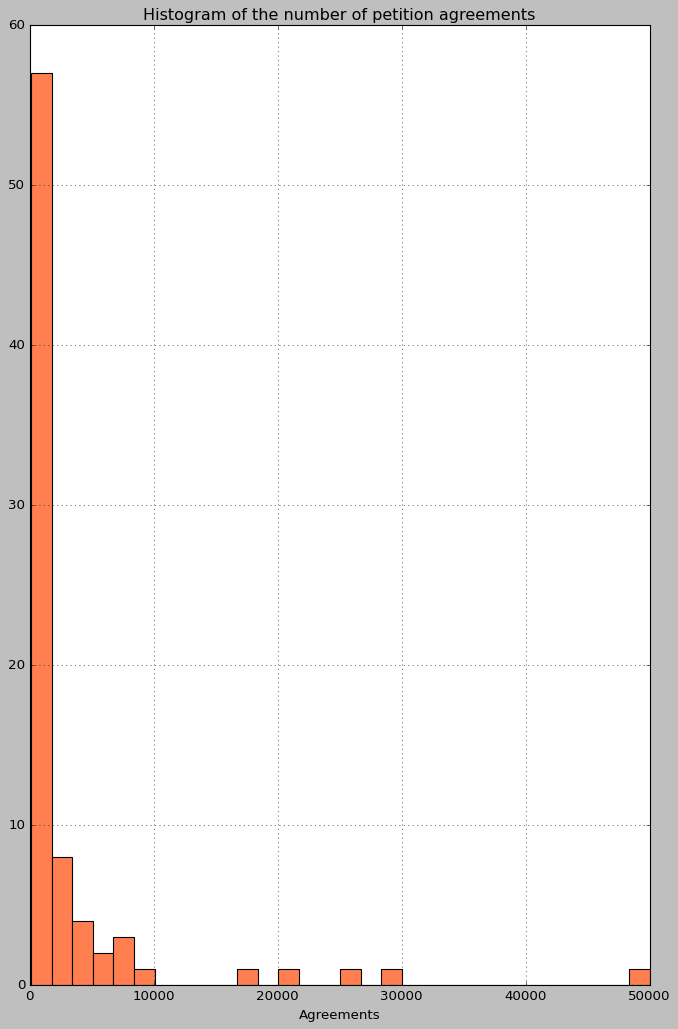

In [30]:
plt.style.use('classic') # 스타일서식 지정
df_petition.hist(figsize=(10, 15), bins=30 ,color='coral')
plt.title('Histogram of the number of petition agreements')
plt.xlabel('Agreements')
plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text

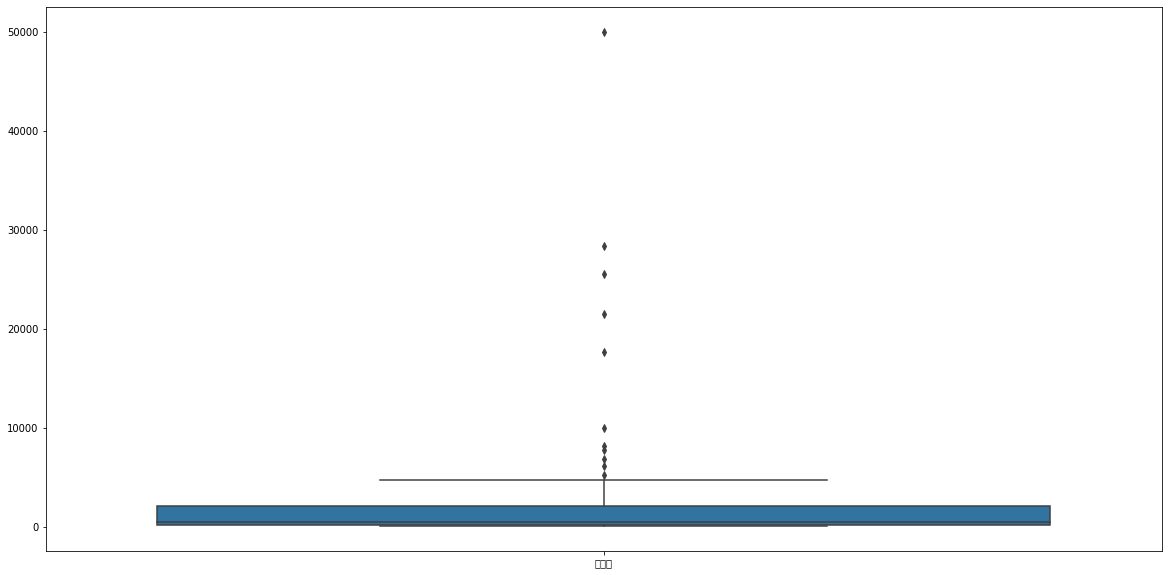

In [19]:
plt.figure(figsize=(20, 10))
_ = sns.boxplot(data=df_petition)

✔️ 성립된 청원은 어떤것인지 찾아보기
(참고 출처: https://dataitgirls2.github.io/tutorial/Tutorial_180717_PandasPetition.html)

In [37]:
# 동의수 == 50000건이면 국민청원이 성립된다.
# 10페이지까지의 청원들 중에 성립된 청원은 딱 1개
df_yes = df_petition.loc[df_petition['동의수'] == 50000]
df_yes

,청원분야,청원제목,동의수,청원종료일,청원결과,청원의 내용,청원의 취지
4,수사/법무/사법제도,연쇄 성범죄자 수원발발이 박○○의 퇴거를 강력히 촉구합니다에 관한 청원,50000,2022-12-05,위원회심사,- 10월 28일(금) 성범죄자의 어머니(수원 호매실 거주)께서 봉담읍 원룸촌에서 ...,저는 경기도 화성시 봉담읍 수기초등학교 운영위원장 입니다\r\n\r\n연쇄성범죄자...


In [39]:
df_yes[["청원제목","청원의 내용"]]

,청원제목,청원의 내용
4,연쇄 성범죄자 수원발발이 박○○의 퇴거를 강력히 촉구합니다에 관한 청원,- 10월 28일(금) 성범죄자의 어머니(수원 호매실 거주)께서 봉담읍 원룸촌에서 ...
